<style>
header {
    padding: 0.5px;
}
footer {
  padding: 0.5px;
  background-color: #70c6ca;
  color: white;
}
</style>

<div class="header">
    <div style="display:inline-block;vertical-align:top;">
    <img src="../tesis/figuras/logo_ucv.png" width="100" align="left"/>
    </div>
    <div style="display:inline-block;">
    <p>
    Universidad Central de Venezuela<br>
            Facultad de Ciencia<br>
            Escuela de Física
    </p>
</div>
    <p>

<h2 align="center"> Búsqueda de nueva física utilizando técnicas de aprendizaje automático en eventos de múltiples jets </h2>
<h3 align="left"> Análisis comparativo de algoritmos de clasificación en términos de reproducibilidad y rendimiento </h3>



<footer>
   <p style='text-align: center;'> 
       <strong>Autor</strong>: Mariana Vivas (<a href="mailto:marianaivivas@gmail.com">marianaivivas@gmail.com</a>)<br>
       <strong>Tutores</strong>: Dra. Reina Camacho Toro (LPNHE/CNRS), Dr. José López (UCV) <br>
       <strong>Co-tutor</strong>: Dra. Camila Rangel Smith (The Alan Turing Institute)
    </p>
    
</footer>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from benchtools.src.plotools import bkg_sig_scatter
np.random.seed(6)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: block;
    text-align: center;
    align-items: middle;
}
</style>
""")

# <font color='#307a71'>Marco teórico</font>

## El modelo estándar
Es la teoría cuántica relativista de de campos que intenta describir las partículas elementales y sus interacciones.

<figure>
<center><img src="../tesis/figuras/sm-particulas.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.1: Contenido de partículas del modelo estándar. Los leptones están organizados de acuerdo a sus generaciones</small></figcaption>
</figure>

Describe tres de las cuatro interacciones fundamentales:
- Interacción electromagnética
- Interacción débil
- Interacción fuerte

### Cromodinámica cuántica
Es la teoría de la interacción fuerte y describe la dinámica de los quarks y gluones.

<img style="float: right; width:60%" src="../tesis/figuras/qcd-alphas.png">

**Libertad asintótica** 

   La constante de acople $\alpha_s$ disminuye al aumentar la transferencia de momento $Q$ y desaparece asintóticamente.

**Confinamiento**
    
   La fuerza de la interacción aumenta a pequeñas transferencias de momento.
  
<figcaption align = "right"> <small>Fig.2: Resumen de medidas experimentales de $\alpha_s$ en función de la escala de energía $Q$</small></figcaption>

### Formación de jets
<figure>
<center><img src="../tesis/figuras/jets-formacion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.3: Esquema de la formación de jets.</small></figcaption>

## Agrupamiento de jets
La existencia de un jet es dependiente de la regla matemática que lo define. Esta regla matemática agrupa los constituyentes del jet de acuerdo a propiedades cinemáticas.
### Recombinación secuencial
Utilizan las siguientes medidas de distancia entre dos constituyentes:
$$
    d_{ij} = min(p_{Ti}^{2p},p_{Tj}^{2p})\times \frac{\Delta R_{ij}^2}{R}
$$
y la distancia entre el eje del haz y el constituyente detectado:
$$
    d_{iB}=p_{Ti}^{2p}
$$

**Algoritmos de recombinación secuencial**
<hr> 

**Input:** Constituyentes del evento<br>
1. Hallar el mínimo en el conjunto $\{d_{ij},d_{iB}\}$:<br>
  1. *Si el mínimo es $d_{ij}$*: los constituyentes *i* y *j* se unen en un solo constituyente *ij*, sumando el cuadri-momento y eliminando *i* y *j*  de la lista de constituyentes.<br>
  2. *Si el mínimo es $d_{iB}$*: *i* se considera jet y eliminado de la lista de constituyentes.  

<hr> 

<figure>
<center><img src="../tesis/figuras/presentacion-algrecombinacion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.4: Algoritmos de recombinación secuencial.</small></figcaption>

## Variables de subestructura
<figure>
<center><img src="../tesis/figuras/jets-diagramajets.png" style="width:90%"></center>
<figcaption align = "center"> <small>Fig.5: Algoritmos de recombinación secuencial.</small></figcaption>

### Masa
La masa de un jet es cercana a la masa de la partícula de la cual se origina, asumiendo que los productos del decaimiento están contenidos en el jet. 

Está definida como la suma de la masa invariante de todos los constituyentes del jet, calculada a partir del cuadri-momento de cada constituyente. 

<figure>
<center><img src="../tesis/figuras/jets-masa.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.6: Distribuciones de la masa del jet principal para jets de quarks y gluones, o fondo, y de una señal de nueva física con partículas de 500 y 100 GeV.</small></figcaption>

### N-subjettiness
Esta variable intenta diferenciar jets de acuerdo al número N de subjets que lo conforman. 
$$
    \tau_N = \left(\frac{1}{d_0}\right)\sum_{i=0}^{i=N} p_{Ti} \times \Delta R_{min,i}
$$

Se prefiere utilizar variables adimensionales $\longrightarrow$ $\tau_{N,N-1}=\frac{\tau_{N}}{\tau_{N-1}}$

<figure>
<center><img src="../tesis/figuras/jets-tau.png" style="width:55%"></center>
<figcaption align = "center"> <small>Fig.7: Distribuciones de $\tau_{21}$ para jets de quarks y gluones, o fondo, y de una señal de nueva física con jets que tienen subestructura de 2 o más jets.</small></figcaption>

### Más allá del modelo estándar
Limitaciones **fenomenológicas**:

- Asimetría materia-antemateria
- Masa de los neutrinos
- Materia oscura y energía oscura

Limitaciones **teóricas**:
- Descripción cuántica de la gravedad
- Origen de las masas/mezclas
- Problema CP fuerte
- Problema de jerarquía

### Eventos dijet
Múltiples modelos de física más allá del modelo estándar (BSM) plantean la existencia de nuevas practiculas. Son de particular interés los eventos que decaen a dos jets porque:
- Una alta fracción de los eventos de colisión resultan en jets.
- Varios modelos predicen la existencia de nuevas partículas masivas que decaen a dos jets
- Los jets son la firma experimental de los quarks y gluones, productos en el decaimiento de los bosones *W/Z* y del bosón de Higgs.

# <font color='#307a71'>Aprendizaje automático para la búsqueda de nueva física</font>

### Aprendizaje automático
El aprendizaje automático es un subcampo de la inteligencia artificial que tiene como objetivo el desarrollo de algoritmos que mejoran su desempeño de manera cuantificable en una tarea determinada.

Hay dos tipos principales de tareas: clasificación y regresión. Estas pueden ser supervisadas y no supervisadas.

<figure>
<center><img src="../tesis/figuras/presentacion-sup-unsup.png" style="width:85%"></center>
<figcaption align = "center"> <small>Fig.8: Ejemplo de clasificación por algoritmo supervisado y no supervisado</small></figcaption>

### Aprendizaje automático en HEP

#### Detección de anomalías
La tarea de detección de anomalías tiene como objetivo predecir la categoría a la que pertenece una muestra: "normal" o "anómala"

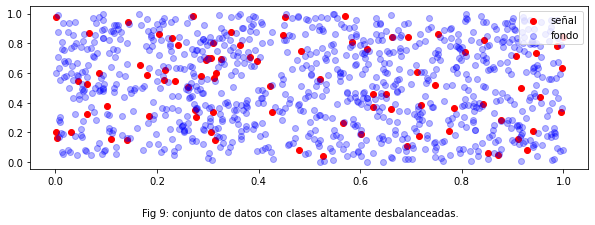

In [2]:
# Imagen detección anomalias
# Creando las etiquetas con el ratio de BB1
label = np.random.choice([0, 1], size=1000, p=[.92, .08])
# Creamos los datos 
xaxis=np.random.rand(1000)
yaxis=np.random.rand(1000)
# Creamos un df con los datos
df = pd.DataFrame(np.stack((xaxis, yaxis, label), axis=1), columns=['x-axis','y-axis','label'])

# Graficamos
fig, ax = plt.subplots(facecolor='white', figsize=[10,3])
# Separamos en señal y fondo
sig = df.loc[df['label']==1]
bkg = df.loc[df['label']==0]
# Plots
ax.scatter(sig['x-axis'], sig['y-axis'], c='r', alpha=1, label='señal')
ax.scatter(bkg['x-axis'], bkg['y-axis'], c='b', alpha=0.3, label='fondo')
# Información
plt.legend(loc='upper right')
txt="Fig 9: conjunto de datos con clases altamente desbalanceadas."
plt.figtext(0.5, -0.09, txt, wrap=True, horizontalalignment='center', fontsize=10);
plt.show()

#### Búsquedas independientes de modelo
- *Libre de modelo*: sin suposiciones sobre las densidades
- *No-paramétrica*: compara las densidades como un todo.
- *No-clasificada*: usa la dimensionalidad completa de la información.

### Olimpiadas LHC 2020
En las olimpiadas se simulan datos que podrían generarse en el acelerador. Los participantes interpretan los datos, buscando partículas y evidencia de teorías que no se han presenciado o confirmados. 

Las olimpiadas de 2020 estuvieron enfocadas en el uso de aprendizaje automático para búsqueda de anomalías en eventos con un estado final de múltiples jets.

<figure>
<center><img src="../tesis/figuras/lhco-topologia.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.10: Un tipo de topología que se puede encontrar en los datos de las LHCO 2020. Evento dijet por el decaimiento de una partícula de nueva física en dos partículas de nueva física que decaen a jets</small></figcaption>

### Resultados LHCO 2020
Los participantes debían reportar el número de eventos de señal, una descripción de la nueva física y un valor p asociado a la hipótesis nula.

#### Reproducibilidad
<center><img src="../tesis/figuras/alglhco-repfig.png" style="width:65%"></center>
<figcaption align = "center"> <small>Fig.11: Resumen de la reproducibilidad de los participantes de las LHCO 2020.</small></figcaption>

### Barreras para la investigación reproducible
<img style="float: right; width:60%" src="../tesis/figuras/presentacion-turing.png">

- Estructura actual de la <br> investigación académica

- Desafios técnicos

- Presiones sobre los <br> científicos de datos

#### <font color='mediumTurquoise'>The Turing Way</font>

Es una guía con la información que los investigadores y científicos de datos necesitan para garantizar que los proyectos en los que trabajan sean fáciles de reproducir y reutilizar.

<figcaption align = "right"> <small>Fig.12: Fig: Proyecto The Turing Way. Zenodo. <br> http://doi.org/10.5281/zenodo.3332807¶</small></figcaption>

# <font color='#307a71'>Datos y métodos</font>

### Conjuntos de datos
Cada evento está compuesto por una lista de todos los hadrones y su cinemática<br> ($p_T,\eta,\phi$). La señal de los conjuntos es $Z'\rightarrow XY$, donde $Z'$, $X$ y $Y$ son partículas BSM.

<img style="float: right; width:60%" src="../tesis/figuras/lhco-RnD.png">

#### R&D
Este conjunto contiene 9.09% de eventos de señal con masas:

$Z'=3.5$ TeV<br> $X=500$ GeV<br> $Y=100$ GeV.

#### BB1
Este conjunto contiene 0.083% de señal con masas:

$Z'=3.823$ TeV<br> $X=732$ GeV<br> $Y=378$ GeV.

<figcaption align = "right"> <small>Fig.13: Diagrama de Feynmann para la señal del conjunto R&D y la BB1.</small></figcaption>

### Algoritmos para detección de anomalías
La implementación de aprendizaje automático en este trabajo está comprendida por:
1. Pre-procesamiento de los datos
2. División de los datos en conjuntos de entrenamiento y prueba
3. Ajuste de los modelos utilizando los datos de entrenamiento
4. Evaluación del rendimiento del modelo

Los algoritmos utilizados en este trabajo se escogieron a partir de su rendimiento, estudiado durante el desarrollo de las herramientas de análisis de datos

### Algoritmos supervisados

#### Bosque aleatorio
<center><img src="../tesis/figuras/ml-bosquealeatorio.png" style="width:90%"></center>
<figcaption align = "center"> <small>Fig.14: Representación visual del funcionamiento de un bosque aleatorio</small></figcaption>

#### Potenciación del gradiente
<center><img src="../tesis/figuras/ml-gbc.png" style="width:70%"></center>
<figcaption align = "center"> <small>Fig.15: Ilustración del funcionamiento de GBC</small></figcaption>

#### Análisis de discriminante cuadrático
<center><img src="../tesis/figuras/ml-qda.png" style="width:90%"></center>
<figcaption align = "center"> <small>Fig.16: Clasificación con QDA. a) Los puntos a ser clasificados, b) los límites o fronteras de decisión. La barra de color indica la probabilidad de pertenecer a la clase 1.</small></figcaption>

#### Redes neuronales
<center><img src="../tesis/figuras/presentacion-nn.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.18: Diagrama de una red neuronal. Las transformaciones se ordenan por capas, donde la salida de una capa es la entrada de la siguiente.</small></figcaption>

### Algoritmos no supervisados

#### KMeans
<center><img src="../tesis/figuras/ml-kmeans.webp" style="width:55%"></center>
<figcaption align = "center"> <small>Fig.19: Distintas inicialización de KMeans en los mismos datos.</small></figcaption>

#### Codificador automático
<center><img src="../tesis/figuras/alg-ae.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.20: Diagrama del funcionamiento de un codificador automático. La entrada se mapea a una representación de dimensionalidad reducida y luego es reconstruida.</small></figcaption>

#### Red generativa antagónica
<center><img src="../tesis/figuras/presentacion-gan.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.21: Diagrama del funcionamiento de una red generativa antagónica. El generador aprende a producir datos para engañar al discriminador.</small></figcaption>

## Algoritmos LHCO 2020
De los algoritmos participantes, se escogieron **UCluster** y **GAN-AE** porque cumplen con las características de reproducibilidad necesarias y proporcionaron la información de manera simple.

| Nombre | Preprocesamiento | Código| Instrucciones | Entorno| Licencia|
|:------:|:-----------------:|:-----:|:-------------:|:------:|:-------:|
| GAN-AE |$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |- |
|UCluster|$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |

### UCluster


### GAN-AE

## Métricas de rendimiento
La métrica de evaluación primaria es la matriz de confusión.
<center><img src="../tesis/figuras/met-matrizconfusion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.22: Matriz de confusión.</small></figcaption>

### Métricas numéricas
| Métrica      | Ecuación &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;| Enfoque de evaluación   |
|:------------|:---------------------------:|:-------------------------|
| Exactitud    | $\frac{TP+TN}{TP+FP+FN+TN}$ | Número correcto de predicciones sobre todas las predicciones hechas |
| Precisión    | $\frac{TP}{TP+FP}$ | Proporción de tasa de verdaderos positivos |
| Recuperación | $\frac{TP}{TP+FN}$ | Efectividad del clasificador para identificar etiquetas positivas |
| Especificidad| $\frac{TN}{TN+FP}$ | Efectividad del clasificador para identificar etiquetas negativas |
| Puntaje f1 | $\frac{2\text{precisión}\times\text{recuperación}}{\text{precisión}+\text{recuperación}}$ | Promedio ponderado de precisión y sensibilidad |
| Exactitud balanceada| $\frac{\text{recuperación}+\text{especificidad}}{2}$| Promedio de la proporción de predicciones correctas de cada clase |

### Métricas bidimensionales

- Los clasificadores asignan un puntaje $\mathcal{D}$ $\longrightarrow$ puntuación más alta significa mayor probabilidad de ser señal
- La clasificación discreta se logra escogiendo un *punto de operación* $\mathcal{D}_{thr}$ $\longrightarrow$ si $\mathcal{D}\geq\mathcal{D}_{thr}$ se clasifica el evento como señal.

<div class="alert alert-info">
  <strong>Nota:</strong> los clasificadores de agrupamiento no asignan puntuaciones, asignan distancias entre los datos y los centroides. En este trabajo, se tomó la distancia hacia el centroide de señal como el puntaje relacionado a la probabilidad de ser señal.
</div>

### Curva ROC
<center><img src="../tesis/figuras/ml-roc.png" style="width:55%"></center>
<figcaption align = "center"> <small>Fig.23: La diagonal representa a un clasificador aleatorio o que no distingue entre clases. En este caso, el clasificador con la curva azul es mejor distinguiendo entre clases.</small></figcaption>

El *área bajo de la curva* (AUC, por sus siglas en inglés) representa la habilidad del clasificador para distinguir entre clases. Un valor de AUC de 0.5 indica que la predicción no es mejor que una clasificación aleatoria. Menor a 0.5 indica que el clasificador está clasificando de manera inversa

### Variaciones de la curva ROC
En HEP se utilizan versiones de esta curva: la curva de *eficiencia de señal* vs. *rechazo de fondo* e *inverso de la eficiencia de fondo* vs. *eficiencia de señal*

<center><img src="../tesis/figuras/ml-otrasroc.PNG" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.24: Ejemplos de otras versiones de la curva ROC.</small></figcaption>

### Curva PR
Para datos altamente desbalanceados se suele sugerir el uso de la curva PR, donde se grafica la precisión vs. la recuperación.
<center><img src="../tesis/figuras/ml-curvapr.png" style="width:50%"></center>
<figcaption align = "center"> <small>Fig.25: Ejemplos de curvas precisión-recuperación.</small></figcaption>

Análogo al AUC, se utiliza la *precisión promedio* (AP, por sus siglas en inglés). La precisión promedio resume la curva PR utilizando la media ponderada de las precisiones logradas en cada umbral, usando como peso el aumento en recuperación del umbral anterior

### Mejora de la significancia
Está definida como:
$$
    \text{Mejora de la significancia} = \frac{\epsilon_s}{\sqrt{\epsilon_b}}
$$
Una mejora de la significancia igual a 2 significa que la mejora de la significancia inicial es amplificada por un factor de 2 después de utilizar la estrategia de clasificación.

<center><img src="../tesis/figuras/ml-significancia.PNG" style="width:50%"></center>
<figcaption align = "center"> <small>Fig.26: Ejemplo de curva de mejora de la significancia.</small></figcaption>

## ✨ Benchtools ✨
Es un paquete de software desarrollado en python con herramientas para el manejo de datos de eventos de jets. Incluye funciones para:
- Manejo de grandes cantidades de datos.
- Calcular variables cinemática y de subestructura de los jets.
- Agrupar jets y calcular variables cinemáticas.
- Graficar datos con dos clases.
- Calcular métricas de rendimiento de algoritmos de clasificación binaria.

También incluye un *pipeline* para comparar modelos de clasificación binaria.

### Preprocesamiento
| Variable          | Descripción                                                         |
|:------------------|:---------------------------------------------------------------------|
| $pT_{ji}$         | Momento transversal del jet *i*                                     |
| $m_{ji}$          | Masa invariante del jet *i*                                         |
| $\eta_{ji}$       | Pseudorapidez del jet *i*                                           |
| $\phi_{ji}$       | Ángulo azimutal en el plano transverso del jet *i*                  |
| $E_{ji}$          | Energía del jet *i*                                                 |
| $\tau_{21,ji}$    | Subjetiness del jet *i*                                             |
| nro. hadrones $ji$| Número de hadrones constituyentes del jet *i*                       |
| $\Delta R$        | Distancia angular entre los dos jets principales                    |
| $m_{jj}$          | Masa invariante de los dos jets principales                         |
| nro. hadrones     | Número de hadrones del evento                                       |

### Pipeline
<center><img src="../tesis/figuras/bench-pipeline.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.27: Diagrama del pipeline de <code>benchtools</code>.</small></figcaption>

# <font color='#307a71'>Exploración de datos</font>

## Datos sin preprocesar
Podemos ver los datos antes de hacer el agrupamiento en jets.

### Estructura de los datos
Cada fila es un evento y la última columna hace referencia a si el evento es fondo (0) o señal (1).

|Evento   |$pT$     | $\eta$  | $\phi$  | $pT$    | $\eta$  | $\phi$  | $\cdots$| señal |
|---------|---------|---------|---------|---------|---------|---------|---------|-------|
| 1       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 1.0   |
| 2       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0.0   |
| $\vdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0.0   |

## Datos preprocesados
Cada grupo participante de las LHCO 2020 preprocesa los datos de manera distinta.

### Benchtools

### UCluster

### GAN-AE

# <font color='#307a71'>Resultados</font>

# <font color='#307a71'>Conclusiones</font>

*Slide Type: Slide*

### Thanks for reading!